Implementación del SGD en TensorFlow
===

* *30 min* | Ultima modificación: Junio 22, 2019

## Función objetivo

Función de Rosenbrock:

$$f(x, y) = 100(x^2 - y)^2 + (1 - x)^2$$

con $x \in [-2.048, 2.048]$ y $y \in [-1.000, 4.000$] y  punto de mínima $f(1.0, 1.0) = 0.0$.

## Método del gradiente descendente

$$\mathbf{x}_k = \mathbf{x}_{k-1} - \mu * \frac{\partial}{\partial \mathbf{x}} f(\mathbf{x}_{k-1})$$ 

In [1]:
def improve(x, y, mu):
    gx, gy = g(x, y)
    x = x - mu * gx
    y = y - mu * gy
    return (x, y)

## Implementación usando TensorFlow

In [5]:
##
##  Preparación
##
import tensorflow as tf
import numpy as np

##
##  Variables del modelo
##
x = tf.Variable(-0.5, np.float32)
y = tf.Variable(+3.5, np.float32)

@tf.function
def f(x):
    return 100 * (x[0] ** 2 - x[1]) ** 2 + (1 - x[0]) ** 2


## Inicializa el optimizador
## Crea un objeto gradiente descendente.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

## Minimiza la función de error
opt = optimizer.minimize(loss=f, var_list=[x, y], grad_loss=None)

## estima el modelo
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    history_x = [x.eval()]
    history_y = [y.eval()]
    history_f = [f.eval()]
    for i in range(100):
        sess.run(opt)
        history_x.append(x.eval())
        history_y.append(y.eval())
        history_f.append(f.eval())

    print(x.eval(), y.eval())
    print(f.eval())

        
plot_contour()
plt.plot(history_x, history_y, '.-', color='blue');

TypeError: in converted code:


    TypeError: tf__f() missing 1 required positional argument: 'x'


## Variaciones del método del gradiente

#### Regla Delta Generalizada

Existen distintas mejoras que han sido propuestas al método básico del gradiente descendente; muchas de ellas se encuentran implementadas en diferentes herramientas y librerías. A continuación se describe la variación conocida como Regla Delta Generalizada, la cual es implementada en la función `MomentumOptimizer` en TensorFlow.

**MomentumOptimizer**. Esta variación es conocida comunmente como Regla Delta Generalizada en la literatura de redes neuronales artificiales y como gradiente con memoria en la literatura sobre optimización numérica. La dirección actual de descenso es la suma ponderada entre la dirección dada por el gradiente en el punto actual y la correción en la iteración anterior.  

La ecuación del método del gradiente descendente

$$ \mathbf{x}_k = \mathbf{x}_{k-1} - \mu \frac{\partial}{\partial \mathbf{x}} f(\mathbf{x}_{k-1})$$

puede escribirse como:

$$ \mathbf{x}_k = \mathbf{x}_{k-1} + \mu \Delta \mathbf{x}_{k-1} $$

donde 

$$ \Delta \mathbf{x}_{k-1} = - \frac{\partial}{\partial \mathbf{x}} f(\mathbf{x}_{k-1})$$

Si se tiene en cuenta que en el caso numérico analizado el gradiente oscila en direcciones contrarias, una mejor decisión sería tomar un promedio de las direcciones anteriores con el fin de avanzar con más facilidad hacia el punto de óptima. En este caso, en la Regla Delta se propone

$$ \Delta \mathbf{x}_{k-1} = - \frac{\partial}{\partial \mathbf{x}} f(\mathbf{x}_{k-1}) + \beta \Delta \mathbf{x}_{k-2}$$

El parámetro $\beta$ es llamado `momentum` en TensorFlow. A continuación se ejemplifica su uso.

0.31488508 0.09604079
0.4703508


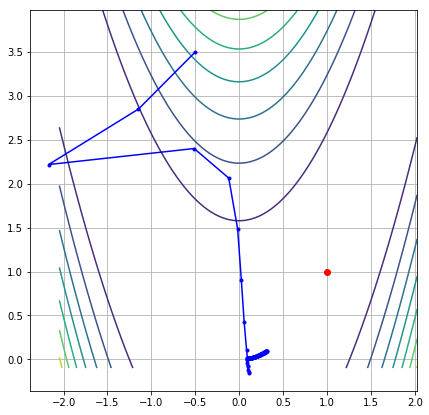

In [11]:
##
##  Variables del modelo
##
x = tf.Variable(-0.5, np.float32)
y = tf.Variable(+3.5, np.float32)

##
## Función de Rosenbrock
##
##   f(x, y) = 100(x^2 - y)^2 + (1 - x)^2
##

f = tf.add(tf.multiply(tf.constant(100.),
                       tf.pow(tf.subtract(tf.pow(x, 2), y), 2)),
           tf.pow(tf.subtract(tf.constant(1.0), x), 2))

##
## Inicializa el optimizador con momentum
##
optimizer = tf.train.MomentumOptimizer(learning_rate=0.001, momentum=0.5)

## Minimiza la función de error
opt = optimizer.minimize(f)

## estima el modelo
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    history_x = [x.eval()]
    history_y = [y.eval()]
    history_f = [f.eval()]
    for i in range(100):
        sess.run(opt)
        history_x.append(x.eval())
        history_y.append(y.eval())
        history_f.append(f.eval())

    print(x.eval(), y.eval())
    print(f.eval())

        
plot_contour()
plt.plot(history_x, history_y, '.-', color='blue');

Note que ya no se producen las oscilaciones que aparecian en el método del gradiente descendente.

En la literatura de optimización, el método es generalizado como gradiente con supermemoria:

$$ \Delta \mathbf{x}_{k-1} = - \frac{\partial}{\partial \mathbf{x}} f(\mathbf{x}_{k-1}) + \sum_{n=0}^N \beta_n \Delta \mathbf{x}_{k-n-2}$$

#### ADAGRAD 

Esta es una variación basada en la observación de que la corrección de los parámetros $\Delta \mathbf{x}_{k-1}$  puede ser muy  grande en la cercanía del punto de óptima haciendo que el algoritmo oscile en las inmediaciones del punto de mínima. Recapitulando que

$$ \mathbf{x}_k = \mathbf{x}_{k-1} - \mu \frac{\partial}{\partial \mathbf{x}} f(\mathbf{x}_{k-1})$$


y que el gradiente es:

$$ \mathbf{g}_{k-1}(\mathbf{x}_{k-1}) = \frac{\partial}{\partial \mathbf{x}} f(\mathbf{x}_{k-1}) $$

puede escribirse como:

$$ \mathbf{x}_k = \mathbf{x}_{k-1} - \mu \mathbf{g}( \mathbf{x}_{k-1}) $$

Si 

$$\Delta \mathbf{x}_{k-1} = - \mu \mathbf{g}( \mathbf{x}_{k-1}) $$

entonces

$$ \mathbf{x}_k = \mathbf{x}_{k-1} + \Delta \mathbf{x}_{k-1}$$

En ADAGRAD, la actulización se realiza individualmente para cada una de las componentes del vector $\mathbf{x}$ como:

$$\Delta x_{i,k-1} = - \frac{\mu}{\sqrt{\sum_{\tau = 1}^{k-1} g_{i,\tau}^2 }} g_{i,k-1}$$

Para la función de Rosenbrock, esto seria:

$$g_{x,t} = \frac{d}{dx}f(x_t,y_t) = 400 x (x_t^2-y_t) - 2(1 - x_t)$$

$$g_{y,t} = \frac{d}{dy}f(x_t,y_t) = -200(x_t^2 - y_t)$$



El término $\sum_{\tau = 1}^{k-1} g_{x,\tau}^2$ en el denominador es la suma del gradiente de $x$ (al cuadrado) calculado sobre todas las iteraciones del algoritmo. Esto causa que la tasa efectiva de aprendizaje vaya disminuyendo con las iteraciones del algoritmo. El método presenta dos problemas: 1) que la tasa de aprendizaje decae con las iteraciones; y 2) que el parámetro $\mu$ debe ser fijado manualmente (de forma externa al algoritmo).

El método se encuentra implementado en la función **AdagradOptimizer** de TensorFlow.

-0.68165344 0.47107196
2.8320808


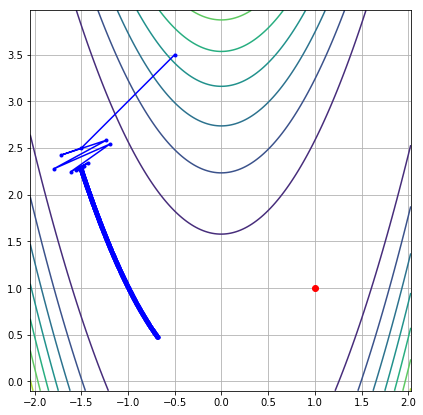

In [23]:
##
##  Variables del modelo
##
x = tf.Variable(-0.5, np.float32)
y = tf.Variable(+3.5, np.float32)

##
## Función de Rosenbrock
##
##   f(x, y) = 100(x^2 - y)^2 + (1 - x)^2
##

f = tf.add(tf.multiply(tf.constant(100.),
                       tf.pow(tf.subtract(tf.pow(x, 2), y), 2)),
           tf.pow(tf.subtract(tf.constant(1.0), x), 2))

##
## Inicializa el optimizador 
##
optimizer = tf.train.AdagradOptimizer(learning_rate=1.00,
                                      initial_accumulator_value = 1.0)

## Minimiza la función de error
opt = optimizer.minimize(f)

## estima el modelo
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    history_x = [x.eval()]
    history_y = [y.eval()]
    history_f = [f.eval()]
    for i in range(1000):
        sess.run(opt)
        history_x.append(x.eval())
        history_y.append(y.eval())
        history_f.append(f.eval())

    print(x.eval(), y.eval())
    print(f.eval())

        
plot_contour()
plt.plot(history_x, history_y, '.-', color='blue');

#### ADADELTA

Esta es una mejora sobre el método anterior. Se parte del cómputo del promedio del gradiente para cada componente como:

$$E[g_i^2]_k = \rho E[g_i^2]_{k-1} + (1 - \rho) g_{i,k}^2$$

el cual equivale a un promedio ponderado entre el gradiente actual y los valores previos del gradiente. El método ADADELTA se basa en corregir los pesos con la raíz cuadrada de la cantidad anterior:

$$\text{RMS} [g_i]_k = \sqrt{E[g_i^2]_k + \epsilon}$$ 

donde $\epsilon$ es una constante. La corrección inicial propuesta por el método es:

$$\Delta x_{i,k-1} = - \frac{\mu}{\text{RMS} [g_i]_{k-1}} g_{i,k-1}$$

Para eliminar la necesidad de fijar un valor de $\mu$, el método propone cambiar la ecuación anterior por:

$$\Delta x_{i,k-1} = - \frac{\text{RMS} [\Delta x_i]_{k-1}}
                            {\text{RMS} [g_i]_{k-1}} g_{i,k-1}$$

El método se encuentra implementado en la clase **AdadeltaOptimizer**. 

0.43580675 0.2554228
0.74727726


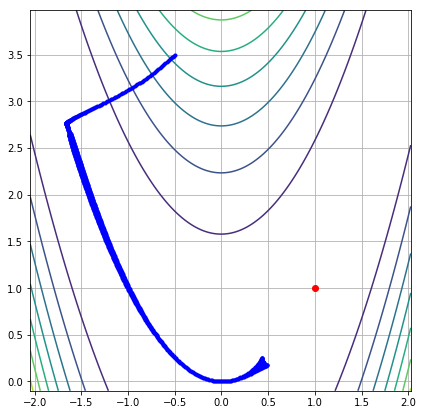

In [24]:
##
##  Variables del modelo
##
x = tf.Variable(-0.5, np.float32)
y = tf.Variable(+3.5, np.float32)

##
## Función de Rosenbrock
##
##   f(x, y) = 100(x^2 - y)^2 + (1 - x)^2
##

f = tf.add(tf.multiply(tf.constant(100.),
                       tf.pow(tf.subtract(tf.pow(x, 2), y), 2)),
           tf.pow(tf.subtract(tf.constant(1.0), x), 2))

##
## Inicializa el optimizador 
##
optimizer = tf.train.AdadeltaOptimizer(learning_rate=1.00,
                                       rho = 0.9,
                                       epsilon = 1e-5)

## Minimiza la función de error
opt = optimizer.minimize(f)

## estima el modelo
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    history_x = [x.eval()]
    history_y = [y.eval()]
    history_f = [f.eval()]
    for i in range(1000):
        sess.run(opt)
        history_x.append(x.eval())
        history_y.append(y.eval())
        history_f.append(f.eval())

    print(x.eval(), y.eval())
    print(f.eval())

        
plot_contour()
plt.plot(history_x, history_y, '.-', color='blue');

**Otros métodos**. Otras metodologías implementadas incluyen `AdamOptimizer` y `RMSPropOptimizer`.

## Opcional --- Implementación usando TensorFlow-for-R

In [8]:
%%R
## 
## Se importa la librería
##
library(tensorflow)

[1] -1.4
[1] 5.941726


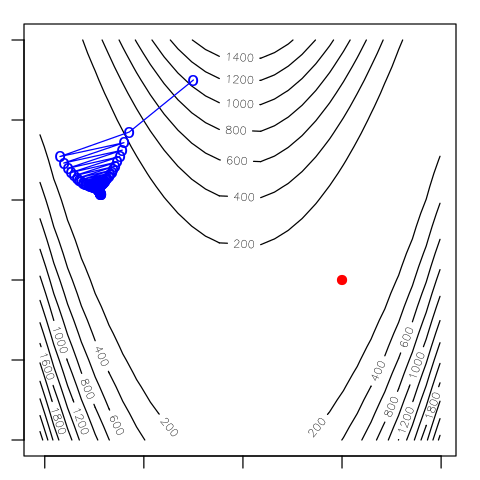

In [9]:
%%R
##
##  Variables del modelo
##
x <- tf$Variable(-0.5, tf$float32)
y <- tf$Variable(+3.5, tf$float32)

##
## Función de Rosenbrock
##
##   f(x, y) = 100(x^2 - y)^2 + (1 - x)^2
##

##
##    f(x, y) = + 
##              +---- * 
##              |     +---- 100
##              |     +---- pow
##              |            +---- -
##              |            |     +---- pow
##              |            |     |      +---- x
##              |            |     |      +---- 2                           
##              |            |     |
##              |            |     +---- y
##              |            |
##              |            +---- 2
##              |
##              +---- pow
##                     +---- -
##                     |     +---- 1
##                     |     +---- x
##                     |
##                     +---- 2
##
r <- tf$add(tf$multiply(tf$constant(100.),
                        tf$pow(tf$subtract(tf$pow(x, 2), y), 2)),
            tf$pow(tf$subtract(tf$constant(1.0), x), 2))

## Inicializa el optimizador
## Crea un objeto gradiente descendente.
optimizer <- tf$train$GradientDescentOptimizer(learning_rate=0.001)

## Minimiza la función de error
opt = optimizer$minimize(r)

## estima el modelo
with(tf$Session() %as% sess, {
    sess$run(tf$global_variables_initializer())
    history_x = c(x$eval())
    history_y = c(y$eval())
    history_r = c(r$eval())
    for(i in 1:100) {
        sess$run(opt)
        history_x <- c(history_x, x$eval())
        history_y <- c(history_y, y$eval())
        history_f <- c(history_r, r$eval())
    }
    print(x$eval(), y$eval())
    print(r$eval())
})
        
f.2D()
lines(history_x, history_y, type='o', pch='o', col='blue');

### Momentum optimizer

[1] 0
[1] 0.4703508


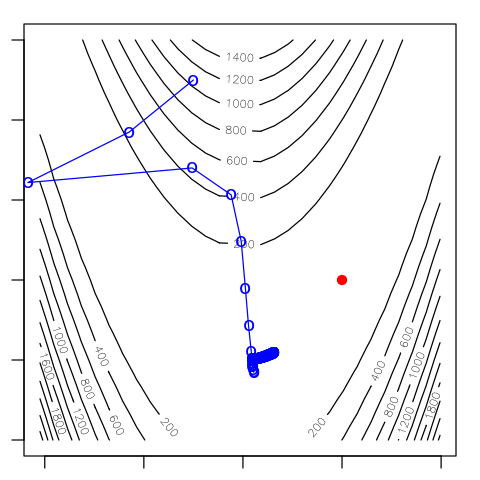

In [10]:
%%R
##
##  Variables del modelo
##
x <- tf$Variable(-0.5, tf$float32)
y <- tf$Variable(+3.5, tf$float32)

##
## Función de Rosenbrock
##
##   f(x, y) = 100(x^2 - y)^2 + (1 - x)^2
##

##
##    f(x, y) = + 
##              +---- * 
##              |     +---- 100
##              |     +---- pow
##              |            +---- -
##              |            |     +---- pow
##              |            |     |      +---- x
##              |            |     |      +---- 2                           
##              |            |     |
##              |            |     +---- y
##              |            |
##              |            +---- 2
##              |
##              +---- pow
##                     +---- -
##                     |     +---- 1
##                     |     +---- x
##                     |
##                     +---- 2
##
r <- tf$add(tf$multiply(tf$constant(100.),
                        tf$pow(tf$subtract(tf$pow(x, 2), y), 2)),
            tf$pow(tf$subtract(tf$constant(1.0), x), 2))

## Inicializa el optimizador
## Crea un objeto gradiente descendente.
optimizer <- tf$train$MomentumOptimizer(learning_rate=0.001, momentum=0.5)

## Minimiza la función de error
opt = optimizer$minimize(r)

## estima el modelo
with(tf$Session() %as% sess, {
    sess$run(tf$global_variables_initializer())
    history_x = c(x$eval())
    history_y = c(y$eval())
    history_r = c(r$eval())
    for(i in 1:100) {
        sess$run(opt)
        history_x <- c(history_x, x$eval())
        history_y <- c(history_y, y$eval())
        history_f <- c(history_r, r$eval())
    }
    print(x$eval(), y$eval())
    print(r$eval())
})
        
f.2D()
lines(history_x, history_y, type='o', pch='o', col='blue');

### ADAGRAD 

[1] -1
[1] 2.832081


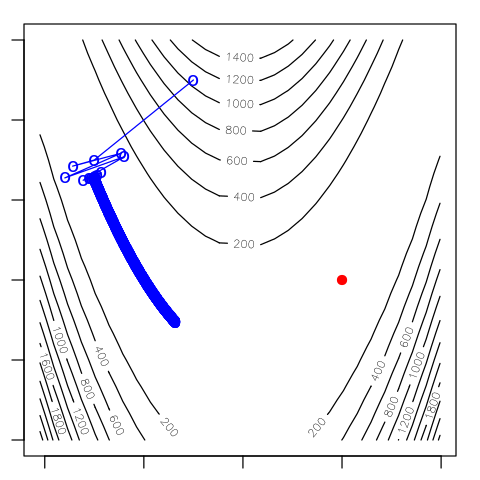

In [11]:
%%R
##
##  Variables del modelo
##
x <- tf$Variable(-0.5, tf$float32)
y <- tf$Variable(+3.5, tf$float32)

##
## Función de Rosenbrock
##
##   f(x, y) = 100(x^2 - y)^2 + (1 - x)^2
##

##
##    f(x, y) = + 
##              +---- * 
##              |     +---- 100
##              |     +---- pow
##              |            +---- -
##              |            |     +---- pow
##              |            |     |      +---- x
##              |            |     |      +---- 2                           
##              |            |     |
##              |            |     +---- y
##              |            |
##              |            +---- 2
##              |
##              +---- pow
##                     +---- -
##                     |     +---- 1
##                     |     +---- x
##                     |
##                     +---- 2
##
r <- tf$add(tf$multiply(tf$constant(100.),
                        tf$pow(tf$subtract(tf$pow(x, 2), y), 2)),
            tf$pow(tf$subtract(tf$constant(1.0), x), 2))

## Inicializa el optimizador
## Crea un objeto gradiente.
optimizer <- tf$train$AdagradOptimizer(learning_rate=1.00,
                                       initial_accumulator_value = 1.0)

## Minimiza la función de error
opt = optimizer$minimize(r)

## estima el modelo
with(tf$Session() %as% sess, {
    sess$run(tf$global_variables_initializer())
    history_x = c(x$eval())
    history_y = c(y$eval())
    history_r = c(r$eval())
    for(i in 1:1000) {
        sess$run(opt)
        history_x <- c(history_x, x$eval())
        history_y <- c(history_y, y$eval())
        history_f <- c(history_r, r$eval())
    }
    print(x$eval(), y$eval())
    print(r$eval())
})
        
f.2D()
lines(history_x, history_y, type='o', pch='o', col='blue');

### ADADELTA

[1] 0
[1] 0.7472773


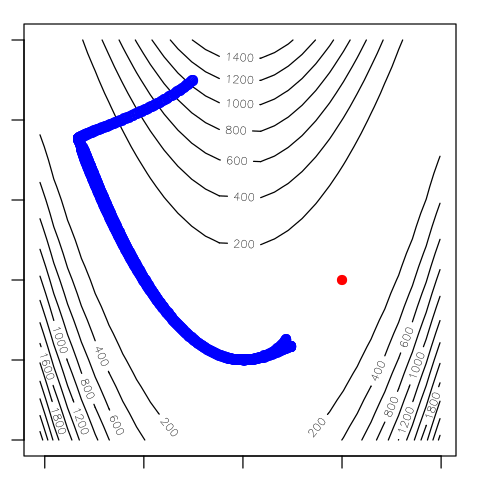

In [12]:
%%R
##
##  Variables del modelo
##
x <- tf$Variable(-0.5, tf$float32)
y <- tf$Variable(+3.5, tf$float32)

##
## Función de Rosenbrock
##
##   f(x, y) = 100(x^2 - y)^2 + (1 - x)^2
##
r <- tf$add(tf$multiply(tf$constant(100.),
                        tf$pow(tf$subtract(tf$pow(x, 2), y), 2)),
            tf$pow(tf$subtract(tf$constant(1.0), x), 2))

## Inicializa el optimizador
## Crea un objeto gradiente.
optimizer <- tf$train$AdadeltaOptimizer(learning_rate=1.00,
                                        rho = 0.9,
                                        epsilon = 1e-5)

## Minimiza la función de error
opt = optimizer$minimize(r)

## estima el modelo
with(tf$Session() %as% sess, {
    sess$run(tf$global_variables_initializer())
    history_x = c(x$eval())
    history_y = c(y$eval())
    history_r = c(r$eval())
    for(i in 1:1000) {
        sess$run(opt)
        history_x <- c(history_x, x$eval())
        history_y <- c(history_y, y$eval())
        history_f <- c(history_r, r$eval())
    }
    print(x$eval(), y$eval())
    print(r$eval())
})
        
f.2D()
lines(history_x, history_y, type='o', pch='o', col='blue');